In [26]:
# Minha solução para o desafio de iniciante do Kaggle

import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
dados=pd.read_csv('train.csv')
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
dados.shape

(891, 12)

In [29]:
# Renomeei as colunas para o português
dados.rename(columns={'PassengerId':'N_passageiro','Survived':'Sobreviveu','Pclass':'Classe','Name':'Nome','Sex':'Sexo','Age':'Idade','SibSp':'Laterais','Parch':'Pais_filhos','Ticket':'Bilhete','Fare':'Tarifa','Cabin':'Cabine','Embarked':'Local_embarque'},inplace=True)
dados.head()

,N_passageiro,Sobreviveu,Classe,Nome,Sexo,Idade,Laterais,Pais_filhos,Bilhete,Tarifa,Cabine,Local_embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# Transformei Sexo e Local_embarque em dados quantitativos, assim posso trabalhar com eles também e ver se ambos são necessários.
dados.Sexo.replace(['male','female'],[0,1],inplace=True)
dados.Local_embarque.replace(['C','Q','S'],[0,1,2],inplace=True)
dados.head()

,N_passageiro,Sobreviveu,Classe,Nome,Sexo,Idade,Laterais,Pais_filhos,Bilhete,Tarifa,Cabine,Local_embarque
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0


In [31]:
dados.describe().round(2)

,N_passageiro,Sobreviveu,Classe,Sexo,Idade,Laterais,Pais_filhos,Tarifa,Local_embarque
count,891.00,891.00,891.00,891.00,714.00,891.00,891.00,891.00,889.00
mean,446.00,0.38,2.31,0.35,29.70,0.52,0.38,32.20,1.54
std,257.35,0.49,0.84,0.48,14.53,1.10,0.81,49.69,0.79
min,1.00,0.00,1.00,0.00,0.42,0.00,0.00,0.00,0.00
25%,223.50,0.00,2.00,0.00,20.12,0.00,0.00,7.91,1.00
50%,446.00,0.00,3.00,0.00,28.00,0.00,0.00,14.45,2.00
75%,668.50,1.00,3.00,1.00,38.00,1.00,0.00,31.00,2.00
max,891.00,1.00,3.00,1.00,80.00,8.00,6.00,512.33,2.00


In [32]:
# Preenchi os dados vazios de Idade e Local_embarque com a média aritmética
dados.Idade.fillna(value=round(dados.Idade.mean(),0),inplace=True)
dados['Local_embarque'].fillna(value=round(dados['Local_embarque'].mean(),0),inplace=True)

In [33]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N_passageiro    891 non-null    int64  
 1   Sobreviveu      891 non-null    int64  
 2   Classe          891 non-null    int64  
 3   Nome            891 non-null    object 
 4   Sexo            891 non-null    int64  
 5   Idade           891 non-null    float64
 6   Laterais        891 non-null    int64  
 7   Pais_filhos     891 non-null    int64  
 8   Bilhete         891 non-null    object 
 9   Tarifa          891 non-null    float64
 10  Cabine          204 non-null    object 
 11  Local_embarque  891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [34]:
# Correlação entre os dados
dados.corr().round(2)

,N_passageiro,Sobreviveu,Classe,Sexo,Idade,Laterais,Pais_filhos,Tarifa,Local_embarque
N_passageiro,1.00,-0.01,-0.04,-0.04,0.03,-0.06,-0.00,0.01,0.01
Sobreviveu,-0.01,1.00,-0.34,0.54,-0.07,-0.04,0.08,0.26,-0.17
Classe,-0.04,-0.34,1.00,-0.13,-0.33,0.08,0.02,-0.55,0.16
Sexo,-0.04,0.54,-0.13,1.00,-0.08,0.11,0.25,0.18,-0.11
Idade,0.03,-0.07,-0.33,-0.08,1.00,-0.23,-0.18,0.09,-0.03
Laterais,-0.06,-0.04,0.08,0.11,-0.23,1.00,0.41,0.16,0.07
Pais_filhos,-0.00,0.08,0.02,0.25,-0.18,0.41,1.00,0.22,0.04
Tarifa,0.01,0.26,-0.55,0.18,0.09,0.16,0.22,1.00,-0.22
Local_embarque,0.01,-0.17,0.16,-0.11,-0.03,0.07,0.04,-0.22,1.00


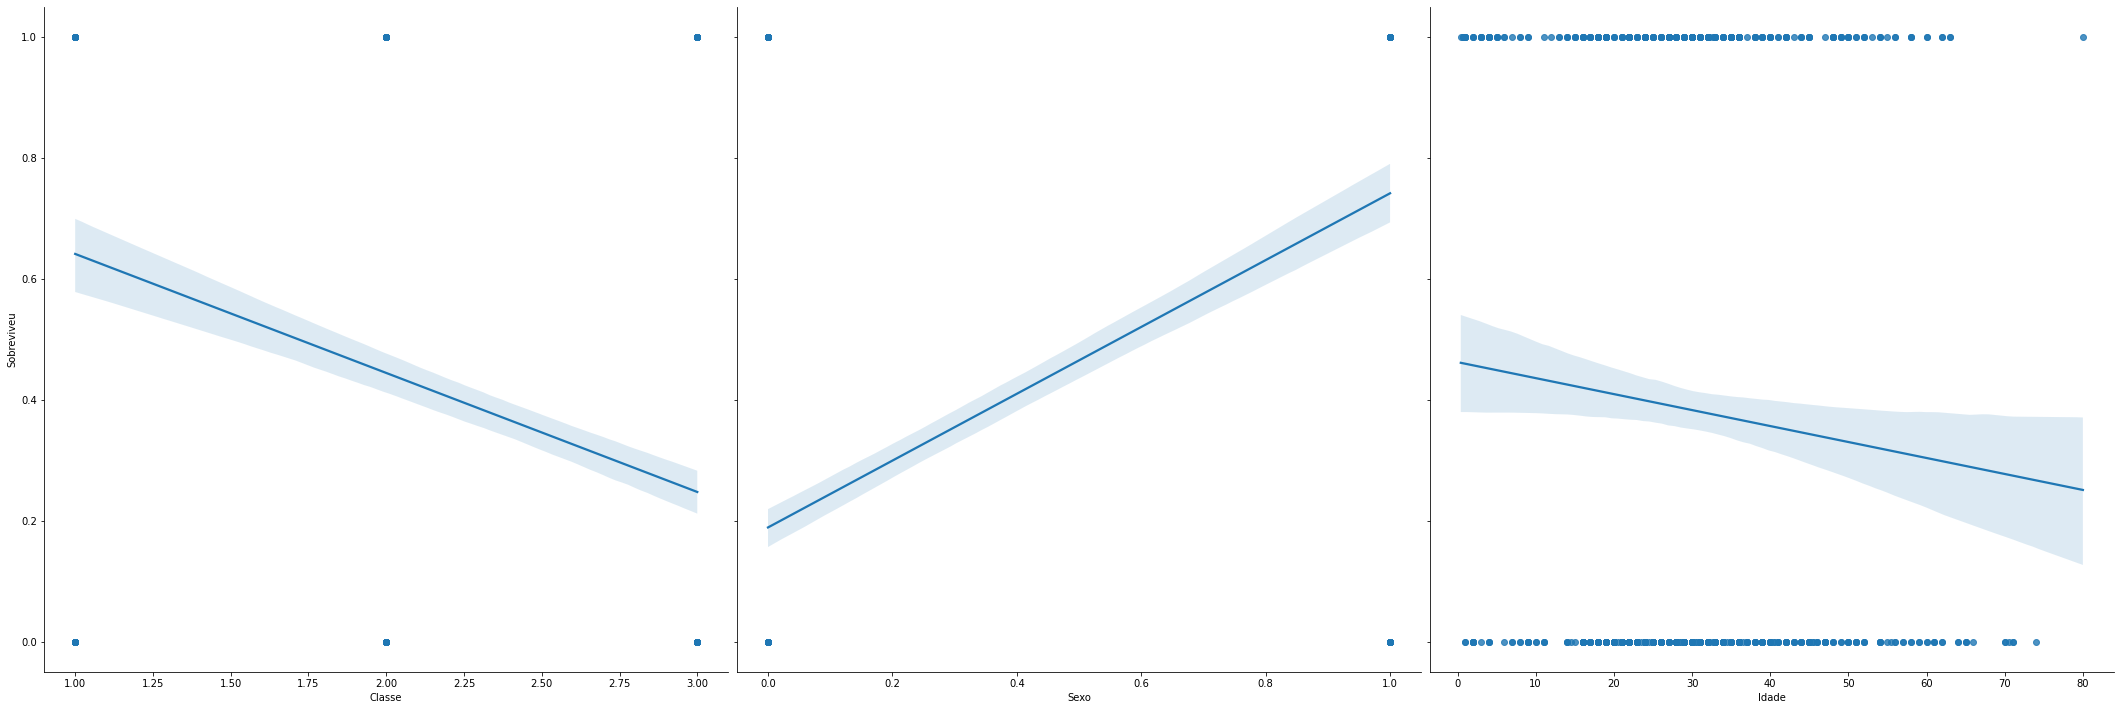

In [35]:
ax=sns.pairplot(dados,y_vars='Sobreviveu',x_vars=['Classe','Sexo','Idade'],kind='reg',height=10)

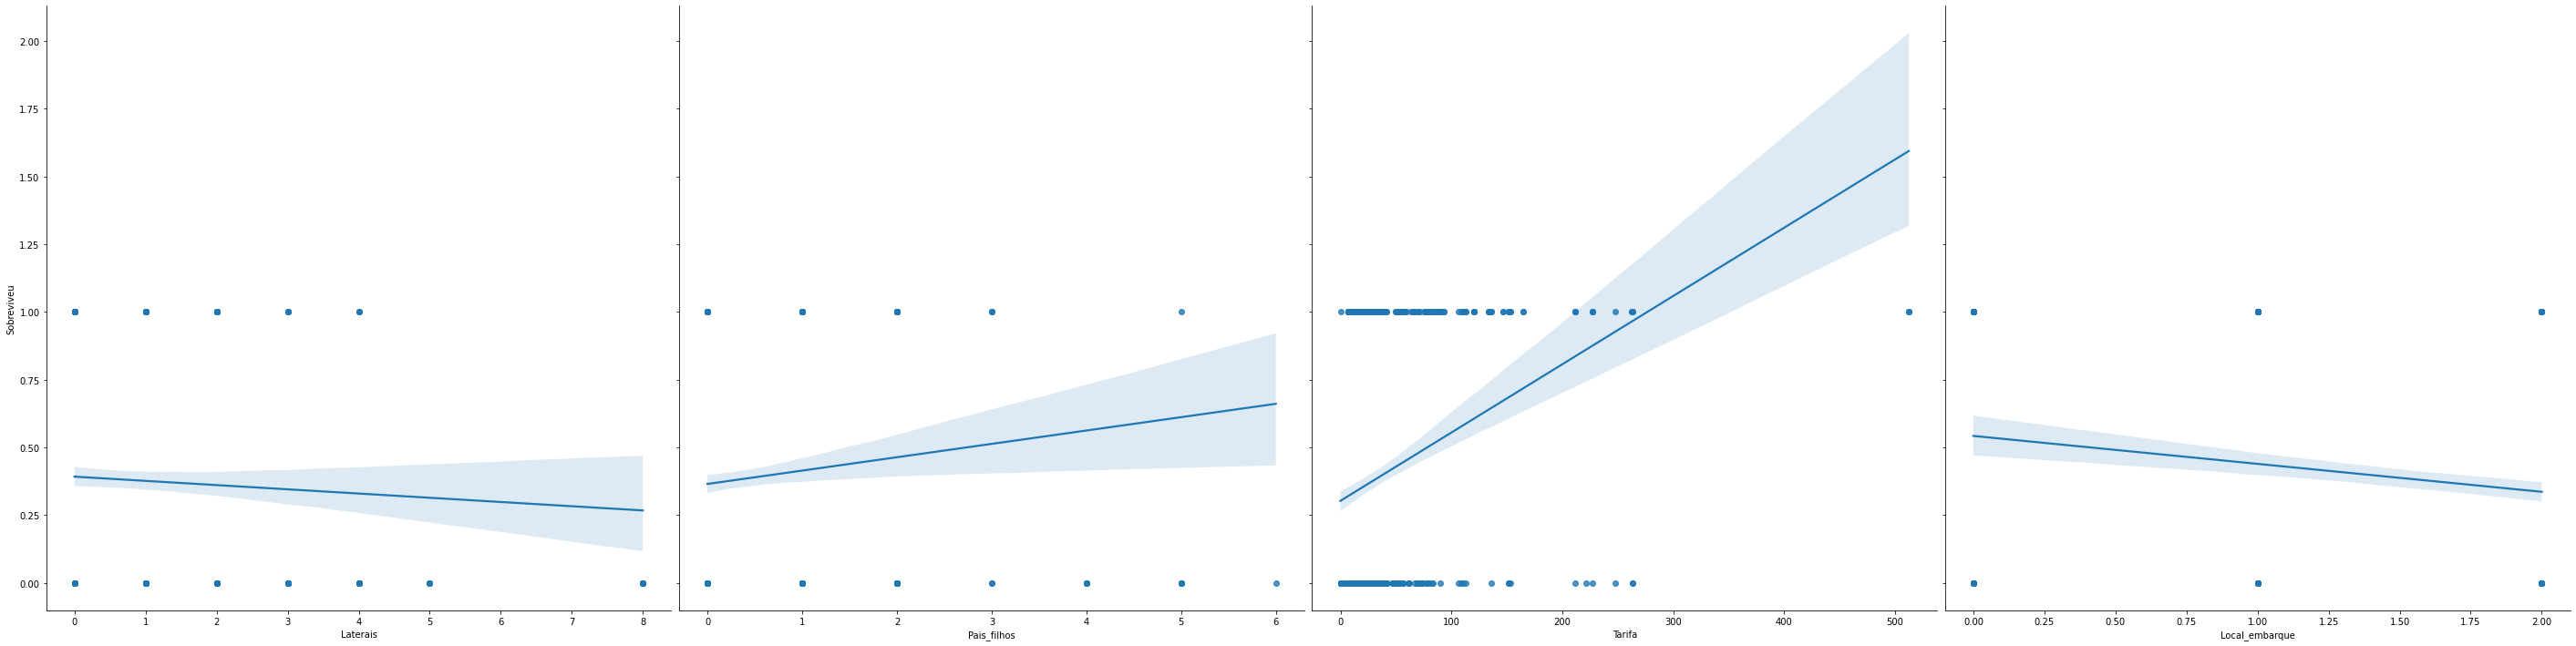

In [36]:
ax=sns.pairplot(dados,y_vars='Sobreviveu',x_vars=['Laterais','Pais_filhos','Tarifa','Local_embarque'],kind='reg',height=10)

In [37]:
dados['log_Sobreviveu']=np.log(dados['Sobreviveu']+1)
dados['log_Classe']=np.log(dados['Classe'])
dados['log_Sexo']=np.log(dados['Sexo']+1)
dados['log_Idade']=np.log(dados['Idade'])
dados['log_Laterais']=np.log(dados['Laterais']+1)
dados['log_Pais_filhos']=np.log(dados['Pais_filhos']+1)
dados['log_Tarifa']=np.log(dados['Tarifa']+1)
dados['log_Local_embarque']=np.log(dados['Local_embarque']+1)

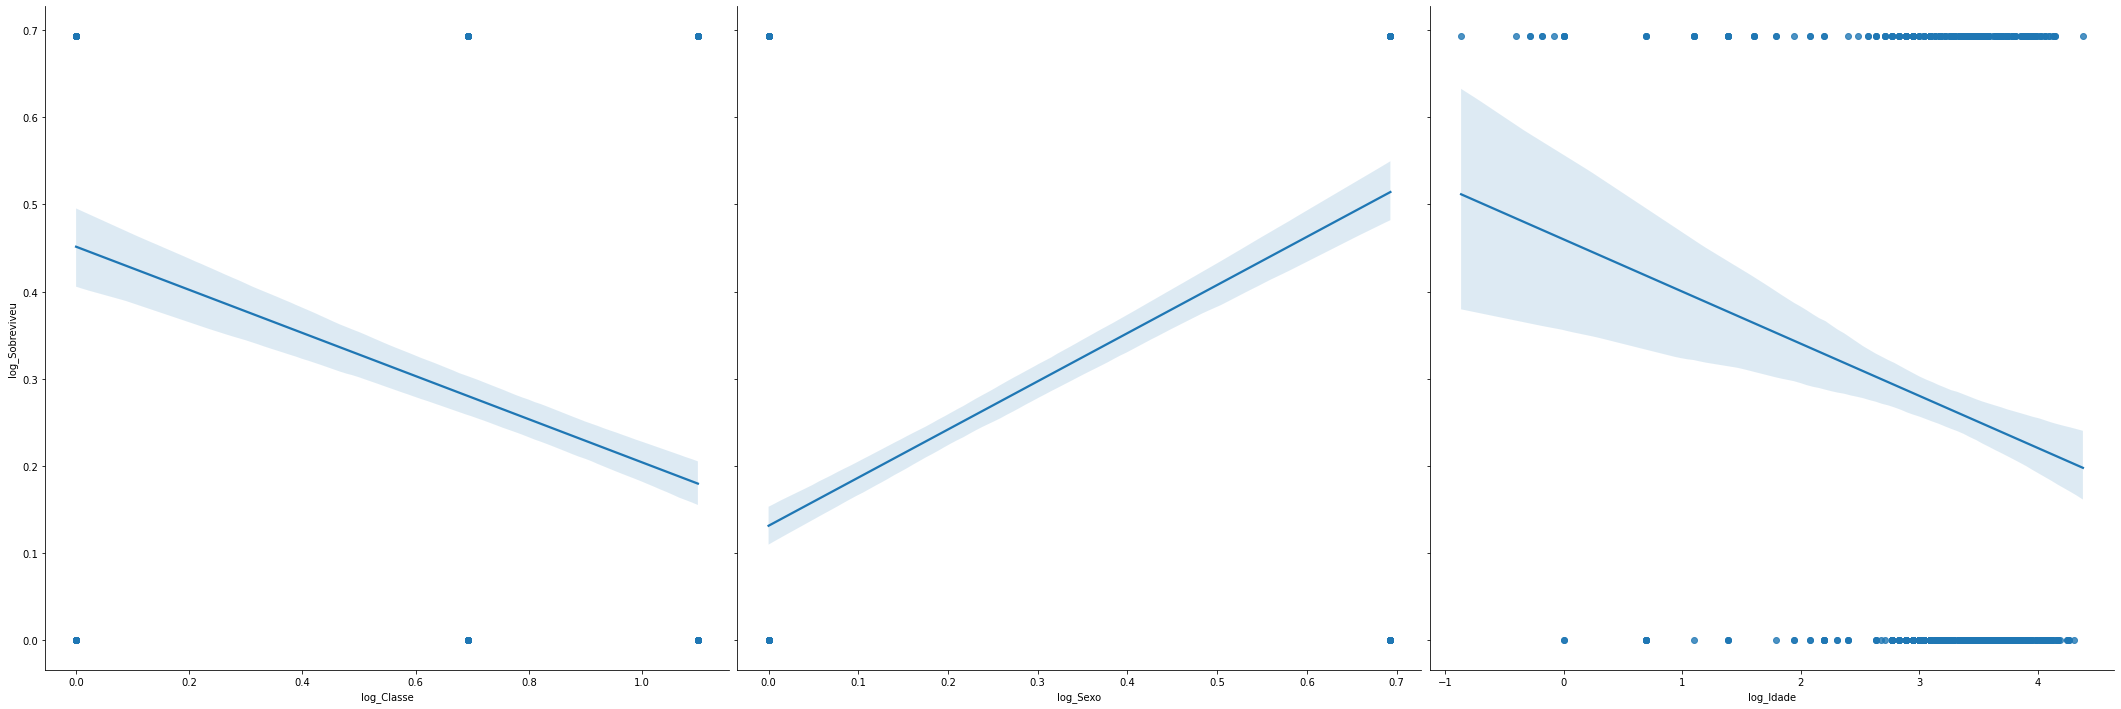

In [38]:
ax=sns.pairplot(dados,y_vars='log_Sobreviveu',x_vars=['log_Classe','log_Sexo','log_Idade'],kind='reg',height=10)

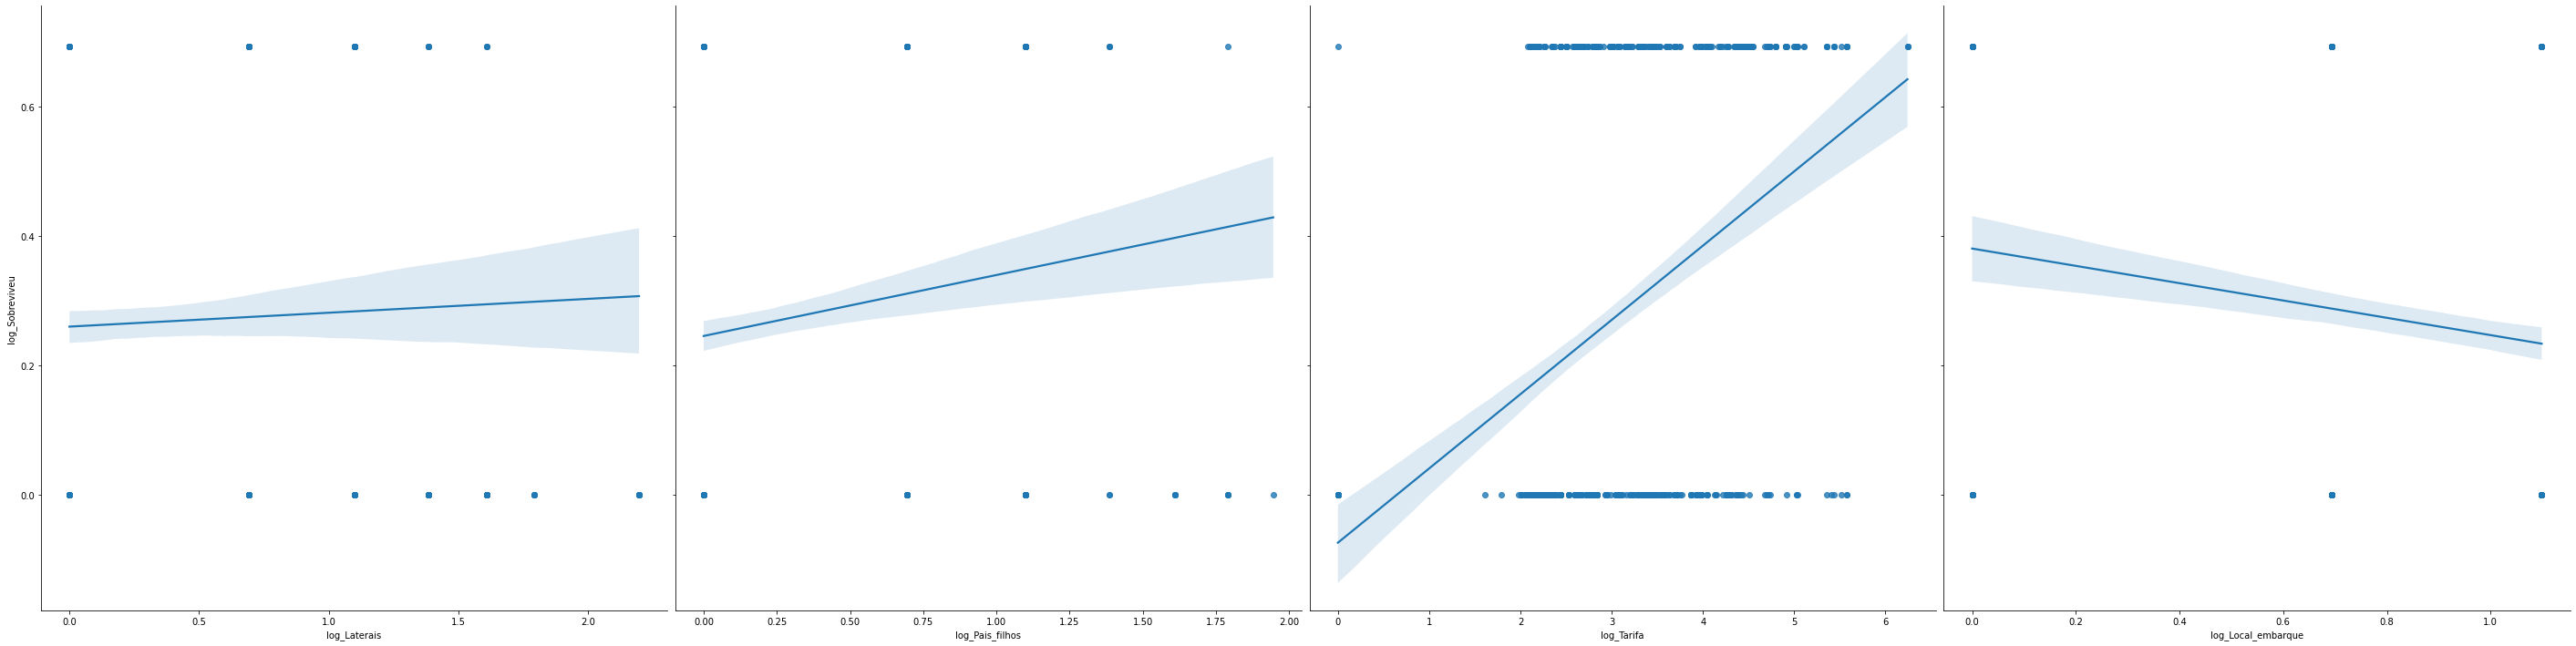

In [39]:
ax=sns.pairplot(dados,y_vars='log_Sobreviveu',x_vars=['log_Laterais','log_Pais_filhos','log_Tarifa','log_Local_embarque'],kind='reg',height=10)

In [40]:
# Fiz toda a Regressão Linear com as variáveis normais e também transformadas usando logarítmo neperiano.
# E analisei qual seria o melhor modelo para a solução do meu problema.

from sklearn.model_selection import train_test_split

In [41]:
y=dados.Sobreviveu
y_log=dados['log_Sobreviveu']

In [42]:
X=dados[['Classe','Sexo','Idade','Laterais','Pais_filhos','Tarifa','Local_embarque']]
X_log=dados[['log_Classe','log_Sexo','log_Idade','log_Laterais','log_Pais_filhos','log_Tarifa','log_Local_embarque']]

In [43]:
import statsmodels.api as sm

In [44]:
X_com_constante=sm.add_constant(X)
X_log_com_constante=sm.add_constant(X_log)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [45]:
modelo_statsmodels = sm.OLS(y, X_com_constante, hasconst = True).fit()

In [46]:
modelo_statsmodels_log = sm.OLS(y_log, X_log_com_constante, hasconst = True).fit()

In [47]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:             Sobreviveu   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     83.39
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           6.32e-93
Time:                        14:06:52   Log-Likelihood:                -395.89
No. Observations:                 891   AIC:                             807.8
Df Residuals:                     883   BIC:                             846.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8410      0.075     11.

In [48]:
print(modelo_statsmodels_log.summary())

                            OLS Regression Results                            
Dep. Variable:         log_Sobreviveu   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     86.28
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.56e-95
Time:                        14:06:52   Log-Likelihood:                -63.223
No. Observations:                 891   AIC:                             142.4
Df Residuals:                     883   BIC:                             180.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5616      0

In [49]:
# Escolhi o modelo com as variáveis transformadas e exclui a variável Local_embarque.

X_log=dados[['log_Classe','log_Sexo','log_Idade','log_Laterais','log_Pais_filhos','log_Tarifa']]
X_log_com_constante=sm.add_constant(X_log)
modelo_statsmodels_log = sm.OLS(y_log, X_log_com_constante, hasconst = True).fit()
print(modelo_statsmodels_log.summary())

                            OLS Regression Results                            
Dep. Variable:         log_Sobreviveu   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     99.96
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           6.30e-96
Time:                        14:06:52   Log-Likelihood:                -64.688
No. Observations:                 891   AIC:                             143.4
Df Residuals:                     884   BIC:                             176.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5247      0.078     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
# Peguei os dados de teste e os tratei como fiz com os de treino
dados_teste=pd.read_csv('test.csv')
dados_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
dados_teste.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [52]:
dados_teste.rename(columns={'PassengerId':'N_passageiro','Pclass':'Classe','Name':'Nome','Sex':'Sexo','Age':'Idade','SibSp':'Laterais','Parch':'Pais_filhos','Ticket':'Bilhete','Fare':'Tarifa','Cabin':'Cabine','Embarked':'Local_embarque'},inplace=True)

dados_teste.Sexo.replace(['male','female'],[0,1],inplace=True)
dados_teste.Local_embarque.replace(['C','Q','S'],[0,1,2],inplace=True)

dados_teste.Idade.fillna(value=round(dados.Idade.mean(),0),inplace=True)
dados_teste['Local_embarque'].fillna(value=round(dados['Local_embarque'].mean(),0),inplace=True)

In [53]:
dados_teste.describe()

,N_passageiro,Classe,Sexo,Idade,Laterais,Pais_filhos,Tarifa,Local_embarque
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,0.363636,30.216507,0.447368,0.392344,35.627188,1.401914
std,120.810458,0.841838,0.481622,12.635016,0.896760,0.981429,55.907576,0.854496
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,2.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [54]:
dados_teste.Tarifa.fillna(value=round(dados.Tarifa.mean(),0),inplace=True)

In [55]:
dados_teste['log_Classe']=np.log(dados_teste['Classe'])
dados_teste['log_Sexo']=np.log(dados_teste['Sexo']+1)
dados_teste['log_Idade']=np.log(dados_teste['Idade'])
dados_teste['log_Laterais']=np.log(dados_teste['Laterais']+1)
dados_teste['log_Pais_filhos']=np.log(dados_teste['Pais_filhos']+1)
dados_teste['log_Tarifa']=np.log(dados_teste['Tarifa']+1)
X_teste=dados_teste[['log_Classe','log_Sexo','log_Idade','log_Laterais','log_Pais_filhos','log_Tarifa']]

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
modelo=LinearRegression()

In [65]:
modelo.fit(X_log,y_log)

LinearRegression()

In [66]:
y_previsto=modelo.predict(X_teste)

In [67]:
lista=np.exp(modelo.predict(X_teste)-1).round(0)

In [69]:
results=pd.DataFrame()

In [70]:
lista_passageiros=dados_teste['N_passageiro']
lista_passageiros

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: N_passageiro, Length: 418, dtype: int64

In [74]:
resultados=pd.DataFrame(lista_passageiros)

In [75]:
resultados.insert(1,'Survived',lista)

In [76]:
resultados.rename(columns={'N_passageiro':'PassengerId'},inplace=True)
resultados

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [77]:
# tranformei a resposta de float para int. O Kaggle só os aceita nesse formato.
results=results.astype('int32')
results

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [78]:
results.to_csv('results.csv',index=False)